In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
file = "police_reports_clean.csv"

police_reports = pd.read_csv(file)

In [3]:
incident_reports = police_reports.drop(columns=["Filed Online", "Police District", "Report Type Description", 
                                                "Incident Description", "Incident Subcategory", "Incident Day of Week", 
                                               "Resolution", "Intersection"])
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23


In [4]:
def extract_year_month(date_str):
    return "-".join(date_str.split("-")[:2])
incident_reports["Incident Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports["Report Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,2021-08,2021-08
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,2021-11,2021-11
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,2018-03,2018-03
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,2019-09,2019-09
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,2020-01,2020-01


In [5]:
def extract_month(date_str):
    return "-".join(date_str.split("-")[:2])
incident_reports["Incident Month"] = incident_reports["Incident Date"].apply(extract_month)
incident_reports["Report Month"] = incident_reports["Incident Date"].apply(extract_month)
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month,Incident Month,Report Month
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,2021-08,2021-08,2021-08,2021-08
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,2021-11,2021-11,2021-11,2021-11
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,2018-03,2018-03,2018-03,2018-03
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,2019-09,2019-09,2019-09,2019-09
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,2020-01,2020-01,2020-01,2020-01


In [19]:
# making dataframes based on type of crime
violent_crimes = ["Assult", "Larceny Theft", "Burglary", "Motor Vehicle Theft", "Robbery",
                  "Weapons Offense", "Arson", "Rape", "Homicide",
                  "Human Trafficking"]

nonviolent_crimes = ["Malicious Mischeif", "Other Miscellaneous", "Fraud", "Drug Offense",
                     "Disorderly Conduct", "Offences Against The Family And Children",
                     "Traffic Violation Arrest", "Weapons Carrying Etc",
                     "Stolen Property", "Forgery and Counterfeiting", "Traffic Collision",
                     "Vandalism", "Prostitution", "Embezzlement", "Civil Sidewalks",
                     "Sex Offense", "Drug Violation", "Malicious Mischief", "Gambling"]

misc_disturbance = ["Liquor Laws ", "Missing Person", "Suspicious Activity", "Miscellaneous Investigation",
        "Other Offenses", "Courtesy Report", "Fire Report", "Vehicle Impounded", "Suicide"]

get_rid_of = ["Non-Criminal", "Recovered Vehicles", "Lost Property", "Warrant", "Other", 
              "Case Closure", "Vehicle Misplaced"]


violent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(violent_crimes)]
nonviolent_crimes_df = incident_reports.loc[incident_reports["Incident Category"].isin(nonviolent_crimes)]
misc_disturbance_df = incident_reports.loc[incident_reports["Incident Category"].isin(misc_disturbance)]

In [7]:
first_year = incident_reports[incident_reports['Incident Year']==2018]
first_year.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month,Incident Month,Report Month
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,2018-03,2018-03,2018-03,2018-03
311,2018-03-16 15:45:00,2018-03-16,2018,2018-03-16 16:35:00,Assault,Excelsior,37.709299,-122.435968,15:45:00,16:35:00,2018-03-16,2018-03,2018-03,2018-03,2018-03
313,2018-07-07 19:51:00,2018-07-07,2018,2018-07-07 20:33:00,Assault,Nob Hill,37.789016,-122.410242,19:51:00,20:33:00,2018-07-07,2018-07,2018-07,2018-07,2018-07
315,2018-03-09 00:29:00,2018-03-09,2018,2018-03-09 00:32:00,Assault,Tenderloin,37.787429,-122.409931,00:29:00,00:32:00,2018-03-09,2018-03,2018-03,2018-03,2018-03
316,2018-04-27 13:10:00,2018-04-27,2018,2018-04-27 13:24:00,Arson,West of Twin Peaks,37.741044,-122.466123,13:10:00,13:24:00,2018-04-27,2018-04,2018-04,2018-04,2018-04


In [8]:
first_year_groupby = first_year.groupby(incident_reports['Incident Year-Month']).count()['Incident Datetime']
first_year_groupby = pd.DataFrame(first_year_groupby)
first_year_groupby.columns = ['Incident Count']
first_year_groupby

,Incident Count
Incident Year-Month,
2018-01,7374
2018-02,6636
2018-03,7118
2018-04,7187
2018-05,7387
2018-06,7206
2018-07,7888
2018-08,7912
2018-09,7435


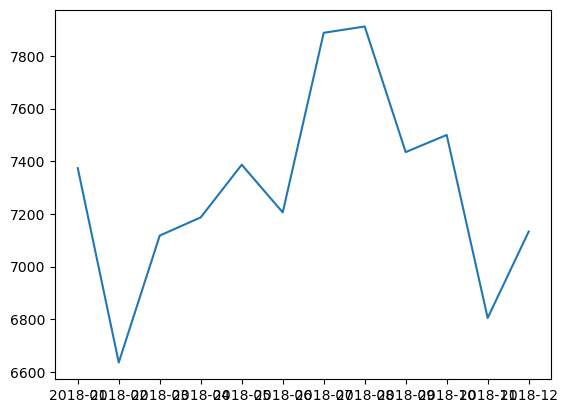

In [13]:
plt.plot(first_year_groupby['Incident Count'])
plt.show()

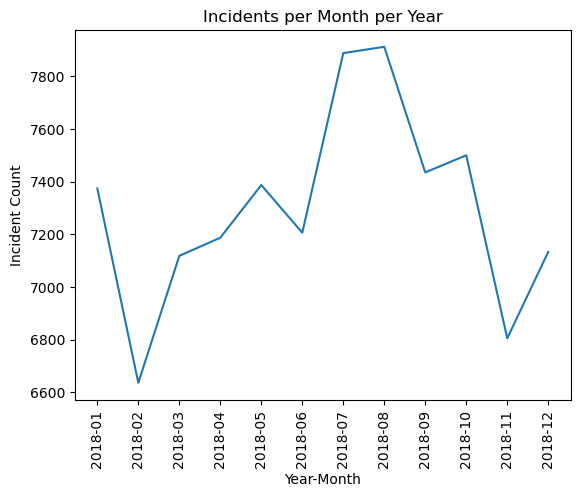

In [16]:
fig, ax = plt.subplots()
ax.plot(first_year_groupby['Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents per Month per Year')
plt.xticks(rotation=90)
plt.show()

In [22]:
first_incidents_groupby = misc_disturbance_df.groupby(misc_disturbance_df['Incident Month']).count()['Incident Datetime']
first_incidents_groupby = pd.DataFrame(first_incidents_groupby)
first_incidents_groupby.columns = ['Misc. Incident Count']
first_incidents_groupby.head()

,Misc. Incident Count
Incident Month,
2018-01,632
2018-02,655
2018-03,644
2018-04,632
2018-05,651


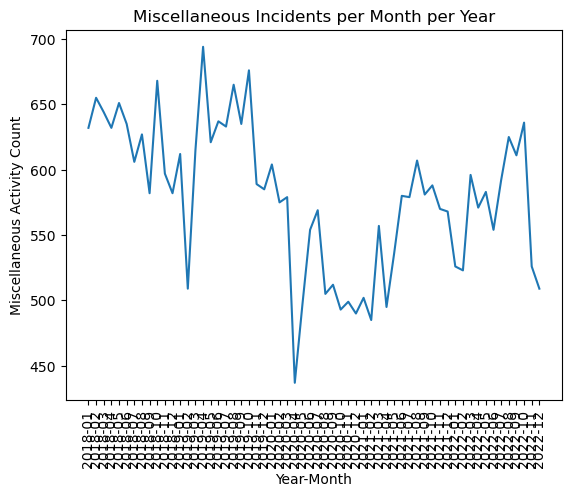

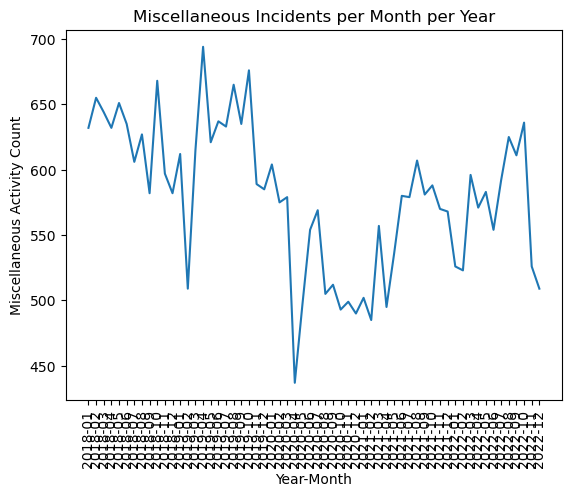

In [27]:
fig, ax = plt.subplots()
ax.plot(first_incidents_groupby['Misc. Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Miscellaneous Activity Count')
ax.set_title('Miscellaneous Incidents per Month per Year')
plt.xticks(rotation=90)
fig

In [15]:
second_year = incident_reports[incident_reports['Incident Year']==2019]
second_year.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month,Incident Month,Report Month
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,2019-09,2019-09,2019-09,2019-09
289,2019-03-14 00:00:00,2019-03-14,2019,2023-03-14 08:36:00,Missing Person,Bayview Hunters Point,37.729910,-122.397177,00:00:00,08:36:00,2023-03-14,2019-03,2019-03,2019-03,2019-03
291,2019-03-14 00:00:00,2019-03-14,2019,2023-03-14 08:36:00,Missing Person,Bayview Hunters Point,37.729910,-122.397177,00:00:00,08:36:00,2023-03-14,2019-03,2019-03,2019-03,2019-03
331,2019-03-27 12:00:00,2019-03-27,2019,2019-03-30 16:28:00,Assault,Excelsior,37.728222,-122.428903,12:00:00,16:28:00,2019-03-30,2019-03,2019-03,2019-03,2019-03
332,2019-04-29 18:41:00,2019-04-29,2019,2019-04-29 18:56:00,Assault,Mission,37.765958,-122.404623,18:41:00,18:56:00,2019-04-29,2019-04,2019-04,2019-04,2019-04


In [11]:
second_year_groupby = second_year.groupby(incident_reports['Incident Year-Month']).count()['Incident Datetime']
second_year_groupby = pd.DataFrame(second_year_groupby)
second_year_groupby.columns = ['Incident Count']
second_year_groupby

,Incident Count
Incident Year-Month,
2019-01,7075
2019-02,6240
2019-03,6819
2019-04,6950
2019-05,7257
2019-06,7115
2019-07,7607
2019-08,7919
2019-09,7559


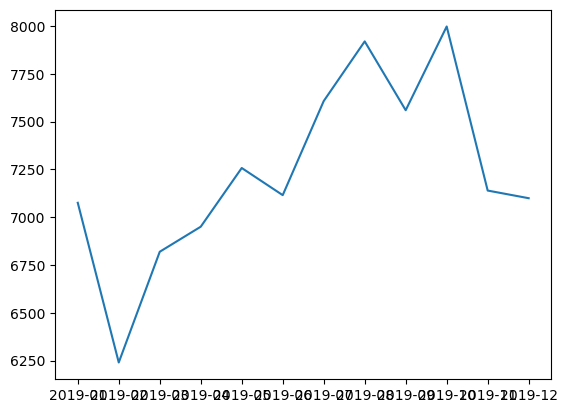

In [12]:
plt.plot(second_year_groupby['Incident Count'])
plt.show()

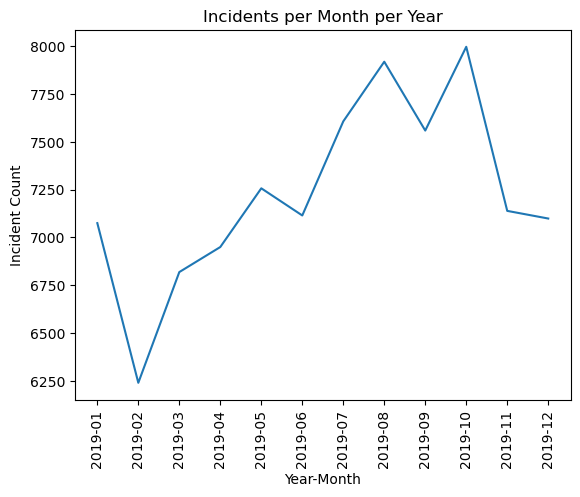

In [14]:
fig, ax = plt.subplots()
ax.plot(second_year_groupby['Incident Count'])
ax.set_xlabel('Year-Month')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents per Month per Year')
plt.xticks(rotation=90)
plt.show()